<a href="https://colab.research.google.com/github/AllaudinAli/Machine-Learning/blob/main/CA_5_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [649]:
import numpy as np
from matplotlib.image import imread
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

Reading the Dataset

In [650]:
df = pd.read_excel('Dataset for People for their Blood Glucose Level with their Superficial body feature readings.xlsx', skiprows=[0])

For some reason columns are Unnamed

Naming Columns manually

In [652]:
df.columns = ['Age', 'Blood Glucose Level(BGL)', 'Diastolic Blood Pressure', 'Systolic Blood Pressure', 'Heart Rate', 'Body Temperature', 'SPO2', 'Sweating (Y/N)', 'Shivering (Y/N)', 'Diabetic/NonDiabetic (D/N)']
print(df.columns)

Index(['Age', 'Blood Glucose Level(BGL)', 'Diastolic Blood Pressure',
       'Systolic Blood Pressure', 'Heart Rate', 'Body Temperature', 'SPO2',
       'Sweating (Y/N)', 'Shivering (Y/N)', 'Diabetic/NonDiabetic (D/N)'],
      dtype='object')


Checking NaN values

In [653]:
nan_counts = df.isna().sum()
print(nan_counts)

Age                           0
Blood Glucose Level(BGL)      0
Diastolic Blood Pressure      0
Systolic Blood Pressure       0
Heart Rate                    0
Body Temperature              0
SPO2                          0
Sweating (Y/N)                0
Shivering (Y/N)               0
Diabetic/NonDiabetic (D/N)    0
dtype: int64


Preprocessing: 


*   Droping index[0]



In [654]:
print(df.head())

   Age  Blood Glucose Level(BGL)  Diastolic Blood Pressure  \
0  Age  Blood Glucose Level(BGL)  Diastolic Blood Pressure   
1    9                        79                        73   
2    9                        80                        73   
3    9                        70                        76   
4    9                        70                        78   

   Systolic Blood Pressure  Heart Rate  Body Temperature  SPO2  \
0  Systolic Blood Pressure  Heart Rate  Body Temperature  SPO2   
1                      118          98         98.300707    99   
2                      119         102         98.300707    94   
3                      110          81         98.300707    98   
4                      115          96         98.300707    96   

    Sweating (Y/N)  Shivering (Y/N)  Diabetic/NonDiabetic (D/N)  
0  Sweating  (Y/N)  Shivering (Y/N)  Diabetic/NonDiabetic (D/N)  
1                0                0                           N  
2                1              

In [655]:
df = df.drop(0, axis=0)

Checking the dataset

In [656]:
df.describe()

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2,Sweating (Y/N),Shivering (Y/N),Diabetic/NonDiabetic (D/N)
count,16969,16969,16969,16969,16969,16969.000000,16969,16969,16969,16969
unique,13,82,39,51,53,15636.000000,7,2,2,2
top,9,68,70,111,95,97.578597,98,0,0,D
freq,6402,2040,1042,816,883,42.000000,7726,14904,14499,16641


Split the data into training and testing sets

In [657]:
X = df.iloc[:, :-1].astype(float)
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fitting SVM classification
And Predicting for Test

In [658]:
my_svm = SVC()
my_svm.fit(X_train, y_train)

y_pred = my_svm.predict(X_test)

Checking Accuracy for good measures

In [659]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 98.02592810842663


Confusion matrix

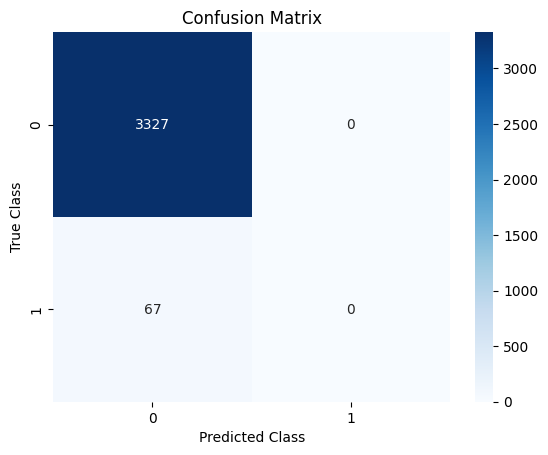

In [660]:
cm = confusion_matrix(y_test, y_pred)
# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# Customize the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Show the plot
plt.show()

In [661]:
# Calc (FRP)
classes = len(set(y_test))
fpr = []
for i in range(classes):
    fp = sum(cm[:, i]) - cm[i, i]
    tn = sum(sum(cm)) - sum(cm[i, :]) - sum(cm[:, i]) + cm[i, i]
    fpr_i = fp / (fp + tn)
    fpr.append(fpr_i)
    
accuracy = accuracy_score(y_test, y_pred)

In [662]:
print("False Positive Rate (FPR) for each class:")
for i in range(classes):
    print("Class {}: {:.4f}".format(i, fpr[i]))

print("Overall Accuracy: {:.4f}".format(accuracy*100))


False Positive Rate (FPR) for each class:
Class 0: 1.0000
Class 1: 0.0000
Overall Accuracy: 98.0259
